# **Import repository**

In [1]:
!git clone https://github.com/onkarkawade/ObjectDetection_CustomDataset.git


Cloning into 'ObjectDetection_CustomDataset'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 112 (delta 6), reused 0 (delta 0), pack-reused 96
Receiving objects: 100% (112/112), 6.28 MiB | 19.49 MiB/s, done.
Resolving deltas: 100% (43/43), done.


# **Set Path in colab**

In [2]:
%cd /content/ObjectDetection_CustomDataset/

/content/ObjectDetection_CustomDataset


# **Install dependancies**

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 695.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0

# Import Dataset from Roboflow
For fasterRCNN use **PASCAL VOC XML** dataset

In [4]:
!curl -L "https://public.roboflow.com/ds/vcoRHL4Zk7?key=s1lIpFmPnb" > roboflow.zip; unzip roboflow.zip -d SPPE; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: SPPE/train/gozluk_059_jpg.rf.551dfd6b7ff4d1b67a837a1cc9e7e7d8.xml  
 extracting: SPPE/train/gozluk_059_jpg.rf.62b9bf353f2d14fc7545d4d75c5a70c0.jpg  
 extracting: SPPE/train/gozluk_059_jpg.rf.62b9bf353f2d14fc7545d4d75c5a70c0.xml  
 extracting: SPPE/train/gozluk_059_jpg.rf.67610f0cf0bb3022905bdab80743eeac.jpg  
 extracting: SPPE/train/gozluk_059_jpg.rf.67610f0cf0bb3022905bdab80743eeac.xml  
 extracting: SPPE/train/gozluk_059_jpg.rf.92659bc4000386b654fd549e52e24f0e.jpg  
 extracting: SPPE/train/gozluk_059_jpg.rf.92659bc4000386b654fd549e52e24f0e.xml  
 extracting: SPPE/train/gozluk_060_jpg.rf.0751db145654fa40ef0ebc20af9d3991.jpg  
 extracting: SPPE/train/gozluk_060_jpg.rf.0751db145654fa40ef0ebc20af9d3991.xml  
 extracting: SPPE/train/gozluk_060_jpg.rf.3ca99bba005100486615ef126cb3234e.jpg  
 extracting: SPPE/train/gozluk_060_jpg.rf.3ca99bba005100486615ef126cb3234e.xml  
 extracting: SPPE/train/gozluk_060_jpg.rf.3ce3a2026e6e40c9

# **Modify yaml file**

In [5]:
%%writefile data_configs/SPPE.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'SPPE/train'
TRAIN_DIR_LABELS: 'SPPE/train'
VALID_DIR_IMAGES: 'SPPE/valid'
VALID_DIR_LABELS: 'SPPE/valid'

# Class names.
CLASSES: [
    '__background__',
    'Coverall', 'Gloves', 'Goggles',
    'Hairnet', 'Mask','Shoe Cover'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 7

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/SPPE.yaml


# **Setup for Training**

In [8]:
!python train.py --data data_configs/SPPE.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 16

2024-04-03 15:56:18.760950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 15:56:18.761006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 15:56:18.762623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 15:56:20.090419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
wandb: Currently logged in as: onkarkawade. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.5
wandb: Run data is saved locally in /content/ObjectDetection_CustomDataset/wand

In [9]:
import matplotlib.pyplot as plt
import glob as glob

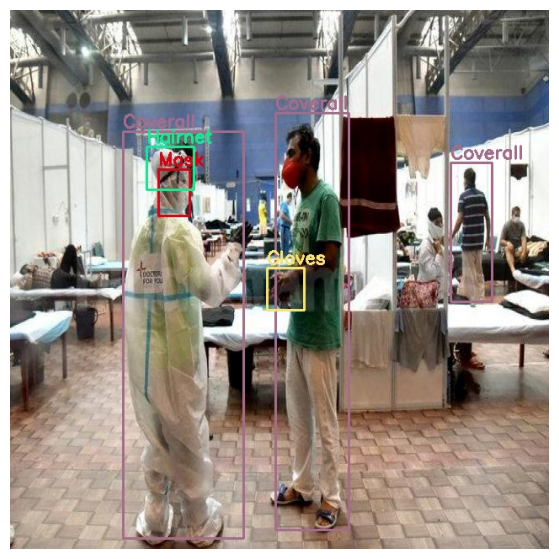

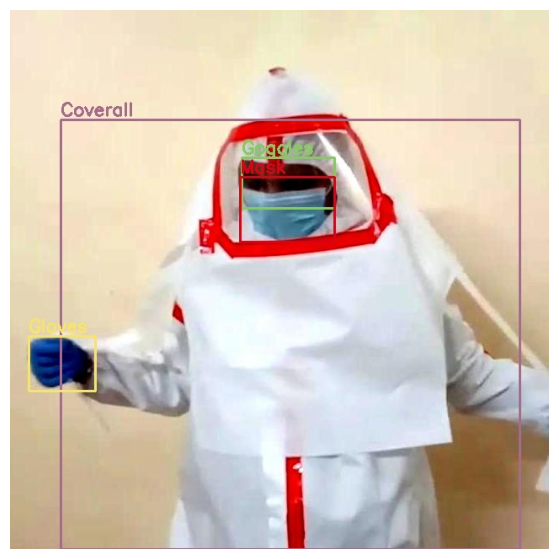

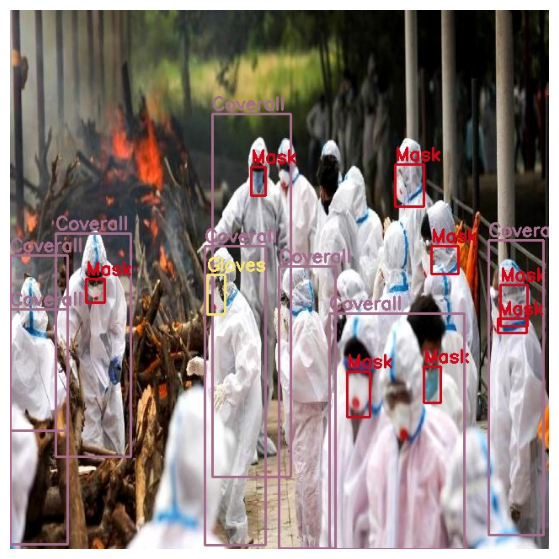

In [11]:
results_dir_path = '/content/ObjectDetection_CustomDataset/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [12]:
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/SPPE.yaml --model fasterrcnn_resnet50_fpn_v2

2024-04-03 17:13:44.741109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 17:13:44.741161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 17:13:44.742729: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 17:13:45.818192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 619/619 [00:00<00:00, 82366.49it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number

In [13]:
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/SPPE.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2024-04-03 17:15:22.147648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 17:15:22.147701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 17:15:22.149388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 17:15:23.239226: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 619/619 [00:00<00:00, 85274.72it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number

In [17]:
from PIL import Image

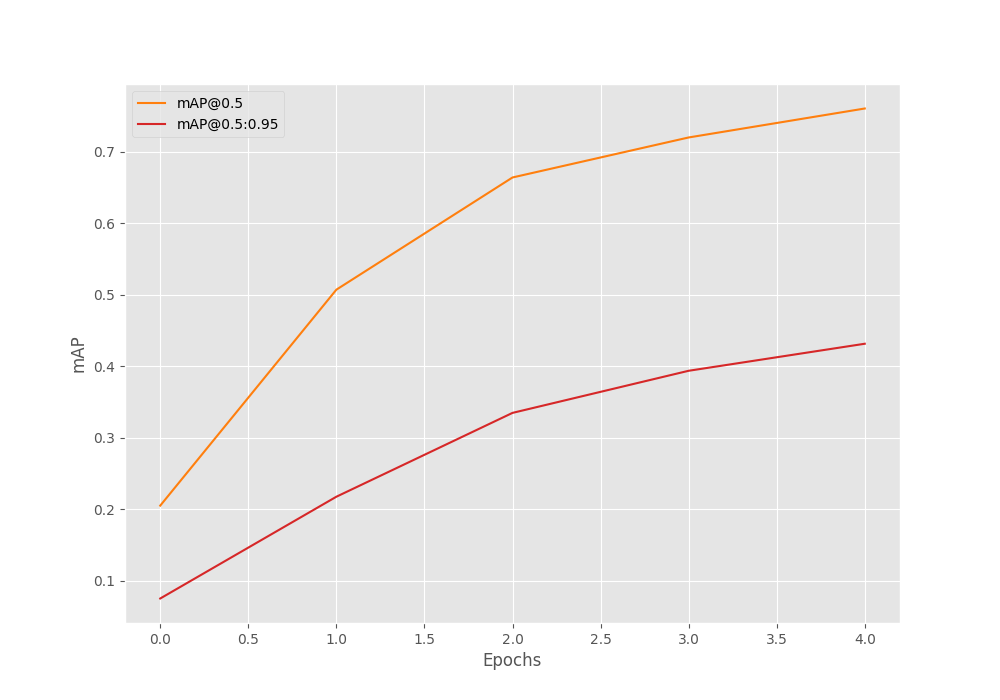

In [20]:
Image.open('/content/ObjectDetection_CustomDataset/outputs/training/custom_training/map.png')

# **Save Results in drive**

In [21]:
from google.colab import drive
import locale
drive.mount('/content/drive')
locale.getpreferredencoding = lambda: "UTF-8"

Mounted at /content/drive


In [23]:
!cp -r /content/ObjectDetection_CustomDataset/outputs /content/drive/MyDrive/Trained_Model/FasterRCNN_1